1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [105]:
import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib.pyplot as plt

In [106]:
N = 1000
mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 3

x1 = np.random.normal(loc = mu1, scale = sigma1, size = N)
x2 = x1 + np.random.normal(loc=mu2, scale = sigma2, size = N)
x3 = ((2*x1) + x2)

X = [x1, x2, x3]

l,V = np.linalg.eig(np.cov(X))

print("Eigenvalue:", l)
print("Eigenvector:", V)

Eigenvalue: [ 2.72148778e+01 -1.03026500e-16  1.96685818e+00]
Eigenvector: [[-0.11869925 -0.81649658  0.56501666]
 [-0.573302   -0.40824829 -0.71039295]
 [-0.8107005   0.40824829  0.41964036]]


In [107]:
U, S, Vt = np.linalg.svd(X)
svd = S**2 / (N - 1)
print("Eigenvalues with SVD:\n", V, "\n ----------\n", svd, "\n")
print("Eigenvectors with SVD:\n", V, "\n ----------\n", U, "\n")

Eigenvalues with SVD:
 [[-0.11869925 -0.81649658  0.56501666]
 [-0.573302   -0.40824829 -0.71039295]
 [-0.8107005   0.40824829  0.41964036]] 
 ----------
 [2.72153374e+01 1.96990171e+00 6.14358939e-30] 

Eigenvectors with SVD:
 [[-0.11869925 -0.81649658  0.56501666]
 [-0.573302   -0.40824829 -0.71039295]
 [-0.8107005   0.40824829  0.41964036]] 
 ----------
 [[-0.11872572  0.56501109 -0.81649658]
 [-0.57326872 -0.71041981 -0.40824829]
 [-0.81072016  0.41960238  0.40824829]] 



In [108]:
mainComponent = S[0]/S.sum()
print("Variability for Main Component: ", mainComponent * 100, "%")
twoFeaturesPercentage = (S[0]+S[1]) /S.sum()
print("Variability for Two Features: ", twoFeaturesPercentage, "%")

Variability for Main Component:  78.79977790486572 %
Variability for Two Features:  0.9999999999999996 %


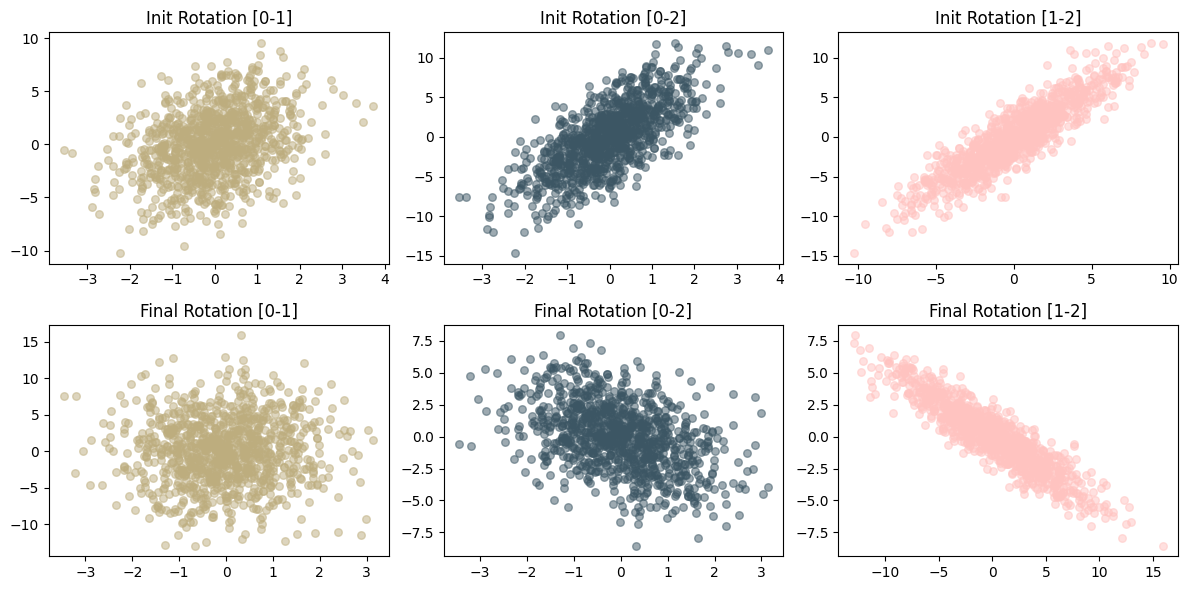

In [109]:
Xp = np.dot(V, X)
fig, axes = plt.subplots(nrows= 2, ncols= 3, figsize= (12, 6))                          
[[ax01, ax02, ax03], [ax11, ax12, ax13]] = axes
ax01.scatter(X[0], X[1], alpha= 0.5, s= 30, color= '#BDAD7E')
ax01.set_title('Init Rotation [0-1]')
ax02.scatter(X[0], X[2], alpha= 0.5, s= 30, color= '#3C5664')
ax02.set_title('Init Rotation [0-2]')
ax03.scatter(X[1], X[2], alpha= 0.5, s= 30, color= '#FFC3C0')
ax03.set_title('Init Rotation [1-2]')

ax11.scatter(Xp[0], Xp[1], alpha= 0.5, s= 30, color= '#BDAD7E')
ax11.set_title('Final Rotation [0-1]')
ax12.scatter(Xp[0], Xp[2], alpha= 0.5, s= 30, color= '#3C5664')
ax12.set_title('Final Rotation [0-2]')
ax13.scatter(Xp[1], Xp[2], alpha= 0.5, s= 30, color= '#FFC3C0')
ax13.set_title('Final Rotation [1-2]')

plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [110]:
noises = np.random.normal(loc=0, scale=1/50, size=(3, N, 10))
xNoise = X + np.sum(noises, axis = 2)

cov1 = np.cov(xNoise)
l1, V1 = np.linalg.eig(cov1)
l1 = np.real_if_close(l1)
U1, S1, Vt1 = linalg.svd(xNoise)
lSvd1 = (S1**2) / (N-1)
VSvd1 = U1

print('Eigenvalues:\n',l1)
print('Eigenvectors:\n', V1)
print('SVD Eigenvalues:\n',lSvd1)
print('SVD Eigenvectors:\n', VSvd1)

Eigenvalues:
 [2.71966936e+01 3.85178728e-03 1.97585741e+00]
Eigenvectors:
 [[-0.11916833 -0.81610829  0.5654787 ]
 [-0.57291358 -0.40863499 -0.71048397]
 [-0.81090624  0.40863762  0.41886318]]
SVD Eigenvalues:
 [2.71972020e+01 1.97852054e+00 3.85459345e-03]
SVD Eigenvectors:
 [[-0.11919328  0.56543745 -0.81613323]
 [-0.57288023 -0.7105283  -0.40860466]
 [-0.81092614  0.41884367  0.40861814]]


In [111]:
Lambda = np.diag(l1)
print('variability :\n', (l1/Lambda.trace())*100)
print((np.sum(l1[[0,2]])/Lambda.trace())*100, "%")

variability :
 [9.32146906e+01 1.32017209e-02 6.77210767e+00]
99.98679827906467 %


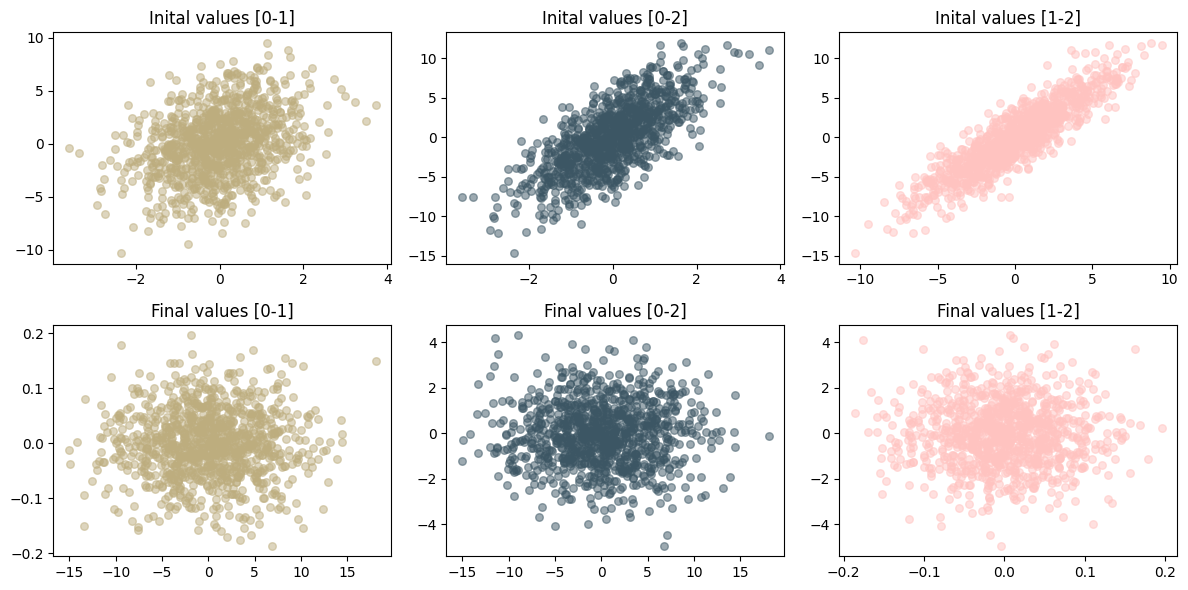

In [112]:
Xp = np.dot(V.T, xNoise)
fig, axes = plt.subplots(nrows= 2, ncols= 3, figsize= (12, 6))

[[ax01, ax02, ax03], [ax11, ax12, ax13]] = axes

ax01.scatter(xNoise[0], xNoise[1], alpha= 0.5, s= 30, color= '#BDAD7E')
ax01.set_title('Inital values [0-1]')
ax02.scatter(xNoise[0], xNoise[2], alpha= 0.5, s= 30, color= '#3C5664')
ax02.set_title('Inital values [0-2]')
ax03.scatter(xNoise[1], xNoise[2], alpha= 0.5, s= 30, color= '#FFC3C0')
ax03.set_title('Inital values [1-2]')

ax11.scatter(Xp[0], Xp[1], alpha= 0.5, s= 30, color= '#BDAD7E')
ax11.set_title('Final values [0-1]')
ax12.scatter(Xp[0], Xp[2], alpha= 0.5, s= 30, color= '#3C5664')
ax12.set_title('Final values [0-2]')
ax13.scatter(Xp[1], Xp[2], alpha= 0.5, s= 30, color= '#FFC3C0')
ax13.set_title('Final values [1-2]')

plt.tight_layout()
plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [113]:
# !curl https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
# !curl https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [114]:
dataset = pd.read_csv("data/magic04.data")
dataset = dataset.drop(['g'], axis=1)
dataset = dataset.T
dataset

,0,1,2,3,4,5,6,7,8,9,...,19009,19010,19011,19012,19013,19014,19015,19016,19017,19018
28.7967,31.6036,162.0520,23.8172,75.1362,51.6240,48.2468,26.7897,96.2327,46.7619,62.7766,...,32.4902,79.5528,31.8373,182.5003,43.2980,21.3846,28.9452,75.4455,120.5135,187.1814
16.0021,11.7235,136.0310,9.5728,30.9205,21.1502,17.3565,13.7595,46.5165,15.1993,29.9104,...,10.6723,44.9929,13.8734,76.5568,17.3545,10.9170,6.7020,47.5305,76.9018,53.0014
2.6449,2.5185,4.0612,2.3385,3.1611,2.9085,3.0332,2.5521,4.1540,2.5786,3.3331,...,2.4742,3.5488,2.8251,3.6872,2.8307,2.6161,2.2672,3.4483,3.9939,3.2093
0.3918,0.5303,0.0374,0.6147,0.3168,0.2420,0.2529,0.4236,0.0779,0.3377,0.2475,...,0.4664,0.1656,0.4169,0.1123,0.2877,0.5857,0.5351,0.1417,0.0944,0.2876
0.1982,0.3773,0.0187,0.3922,0.1832,0.1340,0.1515,0.2174,0.0390,0.1913,0.1261,...,0.2735,0.0900,0.1988,0.0666,0.1646,0.3934,0.2784,0.0549,0.0683,0.1539
27.7004,26.2722,116.7410,27.2107,-5.5277,50.8761,8.5730,29.6339,110.3550,24.7548,-33.9065,...,-27.0097,-39.6213,-16.4919,192.2675,-60.1842,15.2618,37.0816,-9.3561,5.8043,-167.3125
22.011,23.8238,-64.8580,-6.4633,28.5525,43.1887,38.0957,20.4560,85.0486,43.8771,57.5848,...,-21.1687,53.7866,-27.1448,93.0302,-33.8513,11.5245,13.1853,41.0562,-93.5224,-168.4558
-8.2027,-9.9574,-45.2160,-7.1513,21.8393,9.8145,10.5868,-2.9292,43.1844,-6.6812,23.7710,...,8.4813,-30.0054,11.1098,-62.6192,-3.6545,2.8766,-2.9632,-9.4662,-63.8389,31.4755
40.092,6.3609,76.9600,10.4490,4.6480,3.6130,4.7920,0.8120,4.8540,7.8750,9.9144,...,69.1730,15.8075,11.3663,82.1691,78.4099,2.4229,86.7975,30.2987,84.6874,52.7310
81.8828,205.2610,256.7880,116.7370,356.4620,238.0980,219.0870,237.1340,248.2260,102.2510,323.0940,...,120.6680,311.5680,100.0566,283.4731,224.8299,106.8258,247.4560,256.5166,408.3166,272.3174


In [115]:
mCovariance = np.cov(dataset)
l3, V3 = linalg.eig(mCovariance)
index = l3.argsort()[::-1]
l3 = l3[index]
V3 = V3[:,index]

print("Eigenvalues Cov:\n", l3, "\n")
print("Eigenvectors Cov:\n", V3)

Eigenvalues Cov:
 [6.57940709e+03+0.j 3.85406143e+03+0.j 2.01648128e+03+0.j
 1.32681867e+03+0.j 6.10218593e+02+0.j 4.33618554e+02+0.j
 1.17335954e+02+0.j 8.64007193e-02+0.j 1.07368268e-02+0.j
 3.85330787e-04+0.j] 

Eigenvectors Cov:
 [[-3.27831566e-01 -1.34391257e-01  6.54919335e-02  8.63984924e-01
   9.45486785e-02 -1.98590747e-02  3.38166047e-01  3.99908190e-03
  -4.54855335e-04  4.57009104e-05]
 [-1.13818908e-01 -5.38781071e-02 -1.90004002e-02  3.19763260e-01
  -1.97550122e-02  2.32607173e-02 -9.38308008e-01  1.33846960e-02
   6.74914234e-04 -5.73082482e-05]
 [-3.06095229e-03  6.59527755e-04  1.05914677e-03  6.93020544e-03
   2.65186570e-03  1.33537798e-04 -1.08822564e-02 -9.27766268e-01
  -3.72227209e-01  2.26325035e-02]
 [ 9.27207133e-04 -2.58262608e-04 -5.10330302e-04 -2.60551065e-03
  -1.53901245e-03 -3.47117394e-05  3.06281191e-03  3.22018741e-01
  -7.69225390e-01  5.51884502e-01]
 [ 5.21959171e-04 -1.52747029e-04 -2.94589142e-04 -1.51272408e-03
  -9.19355464e-04 -2.22106506e-0

In [116]:
U, s, Vt = linalg.svd(dataset)
svd2 = s**2 / (N-1)
i = svd2.argsort()[::-1]
svd2 = svd2[i]
vectorSvd = U
vectorSvd = vectorSvd[:,i]

print("\nEigenvalues SVD:\n", svd2, "\n")
print("Eigenvectors SVD:\n", vectorSvd)


Eigenvalues SVD:
 [9.08885480e+05 7.99313396e+04 3.96852588e+04 2.54840841e+04
 1.56378447e+04 8.25609948e+03 2.23433984e+03 1.07386239e+01
 6.63577504e-01 8.04581386e-03] 

Eigenvectors SVD:
 [[-2.66208735e-01 -2.37034775e-01 -6.48153220e-02  8.45577187e-01
   1.96987003e-01 -2.03127799e-02  3.38390224e-01 -3.87764407e-03
   2.47954718e-03  5.47427658e-05]
 [-1.08401603e-01 -8.28343641e-02  2.48704414e-02  3.16060413e-01
   1.86198249e-02  2.38000121e-02 -9.37935865e-01 -1.40146091e-02
   6.44943435e-03  9.01654429e-05]
 [-1.24912268e-02  1.91925504e-03  1.42281884e-03  8.69099473e-03
  -9.34230025e-03 -2.06422012e-04 -1.18956329e-02  9.82828784e-01
  -1.83179025e-01 -5.18917088e-03]
 [-1.50699595e-03  7.18381249e-04  1.29723959e-03 -1.98124391e-03
  -4.73978215e-03 -8.44504096e-05  2.84061114e-03  1.59869685e-01
   8.43314596e-01  5.13052862e-01]
 [-8.50649080e-04  3.99112059e-04  7.39562162e-04 -1.15812463e-03
  -2.71810252e-03 -4.93195255e-05  1.68937808e-03  8.96153143e-02
   5.0

In [117]:
print("variability: ", np.real(np.sum(l3[:2])/np.sum(l3)) * 100, "%")

variability:  69.84496728861288 %


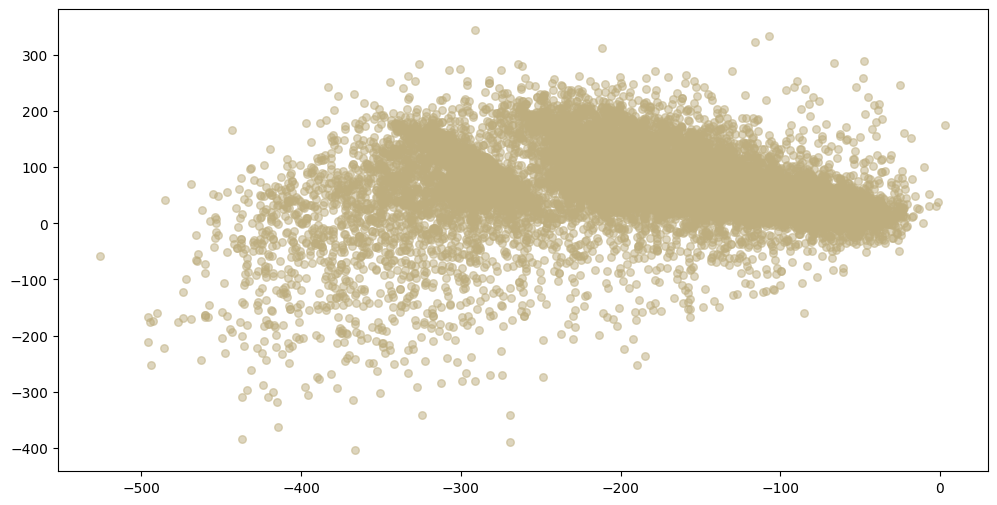

In [118]:
V3 = V3[:,:2]
PCA = np.dot(V3.T, dataset)

plt.figure(figsize=(12, 6))
plt.scatter(PCA[0,:], PCA[1,:], alpha= 0.5, s= 30, color= '#BDAD7E')
plt.show()